In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

initial x:
shape = (10, 1)
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

transformed x:
shape = (10, 2)
[[  1.   1.]
 [  2.   4.]
 [  3.   9.]
 [  4.  16.]
 [  5.  25.]
 [  6.  36.]
 [  7.  49.]
 [  8.  64.]
 [  9.  81.]
 [ 10. 100.]]

Polynomial Intercept (b0): 0.0
Polynomial Coefficents (b1, b2): [5.155619e-16 1.000000e+00]
Polynomial R2 score: 1.0

Linear Intercept (b0):  -21.999999999999993
Linear Coefficient (b1):  [11.]
Linear R2 score: 0.9497645211930926

predict [[6]] in fx = [36.]
predict [[6]] in lfx = [44.]



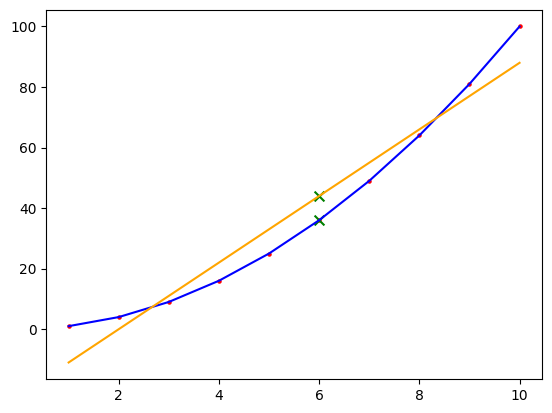

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
# x = np.arange(100).reshape(-1, 1)
# x = np.array([3, 1, 8, 2, 9, 5, 11, 25, 4, 7]).reshape(-1, 1)

y = np.array([1, 4, 9, 16, 25, 36, 49, 64, 81, 100])
# y = x**2
# y = np.array([7, 13, 20, 25, 3, 9, 4, 8, 10, 15])

transformer = PolynomialFeatures(degree=2, include_bias=False).fit(x) # include_bias=False: elimizdeki inputlari kullan ve buna bagli olarak interaction yap
x_ = transformer.transform(x)

print(f'initial x:\nshape = {x.shape}\n{x}\n')
print(f'transformed x:\nshape = {x_.shape}\n{x_}\n')

fx = LinearRegression().fit(x_, y)
print(f'Polynomial Intercept (b0): {fx.intercept_}')
print(f'Polynomial Coefficents (b1, b2): {fx.coef_}')
print(f'Polynomial R2 score: {fx.score(x_, y)}')

lfx = LinearRegression().fit(x, y)
print('\nLinear Intercept (b0): ', lfx.intercept_)
print('Linear Coefficient (b1): ', lfx.coef_)
print(f'Linear R2 score: {lfx.score(x, y)}')

# example
val = np.array([6]).reshape(-1, 1)

val_trans = PolynomialFeatures(degree=2, include_bias=False).fit(val)
val_ = val_trans.transform(val)

val_pred = fx.predict(val_)
print(f'\npredict {val} in fx = {val_pred}')

lval_pred = lfx.predict(val)
print(f'predict {val} in lfx = {lval_pred}\n')

# visualization graphically
plt.scatter(x, y, color='red', marker='o', s=5)

y_pred = fx.predict(x_)
plt.plot(x, y_pred, color='blue')

ly_pred = lfx.predict(x)
plt.plot(x, ly_pred, color='orange')

plt.scatter(val, val_pred, color='green', marker='x', s=50)
plt.scatter(val, lval_pred, color='green', marker='x', s=50)

plt.show()